In [ ]:
#https://www.kaggle.com/code/themlphdstudent/campus-recruitment-eda-classification
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns





# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("C:/Users/sit.lab7/Desktop/Placement.csv")

In [ ]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
print(data.columns.values)

['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


In [ ]:
print('='*50)
print("Describe data")
print('='*50)
print(data.describe())

Describe data
            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [ ]:
#As it is clear that we don't need sl_no in training model or in EDA. Thus I am dropping sl_n column. Rest of them I will keep as it is. After performing EDA I will drop other if needed.

In [ ]:
data = data.drop(['sl_no'], axis=1)

In [ ]:
#Exploring important features

<Axes: xlabel='status', ylabel='count'>

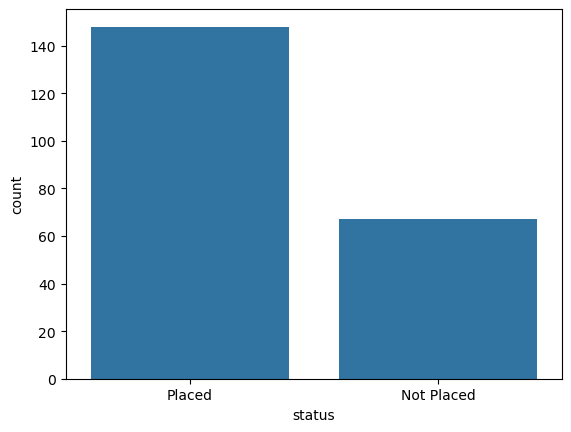

In [ ]:
sns.countplot( data=data,x=data['status'])

In [ ]:
data['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data.groupby(['gender','status'])['status'].count())
df

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

<Axes: xlabel='gender', ylabel='count'>

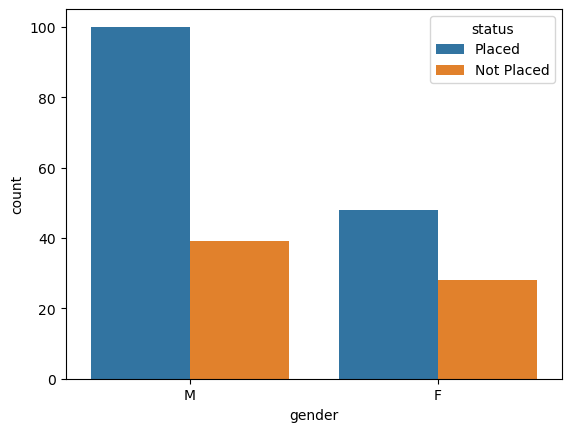

In [ ]:
sns.countplot(x='gender', hue='status', data=data)

In [ ]:
#Conclusion: Male have high chances of getting placed compared to females.

In [ ]:
#SSC Percentage

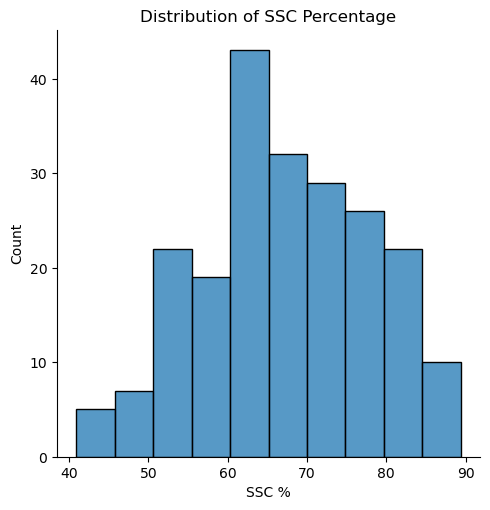

In [ ]:
sns.distplot(data['ssc_p'])
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')
plt.show()

Text(30.37839506172839, 0.5, 'SSC %')

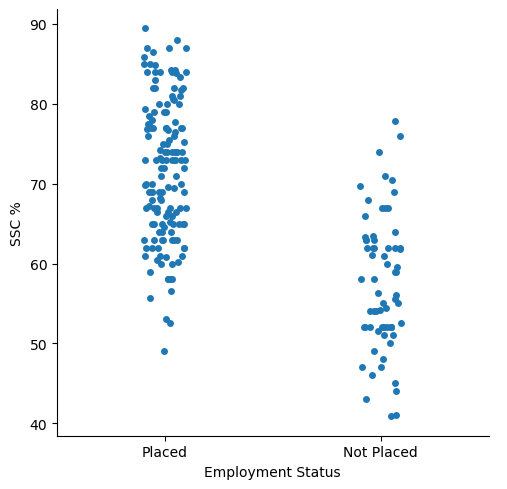

In [ ]:
sns.catplot(y='ssc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

In [ ]:
data['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data.groupby(['ssc_b','status'])['status'].count())
df

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

<Axes: xlabel='ssc_b', ylabel='count'>

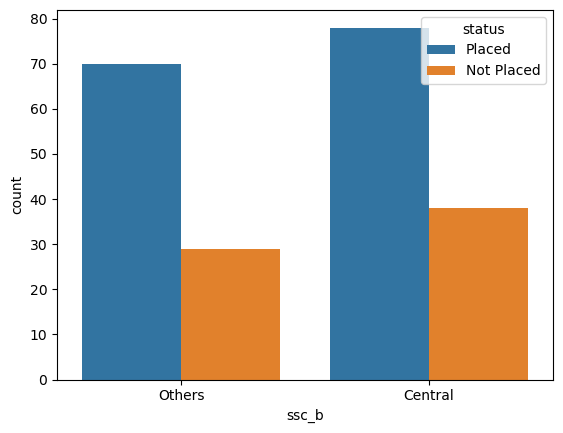

In [ ]:
sns.countplot(x='ssc_b', hue='status', data=data)

In [ ]:
#conclusion: From the above analysis I can say that, SSC board is not important to recruiters when it come to hiring candidates. So I am not going to use this feature while training model.

In [ ]:
#HSC Percentage

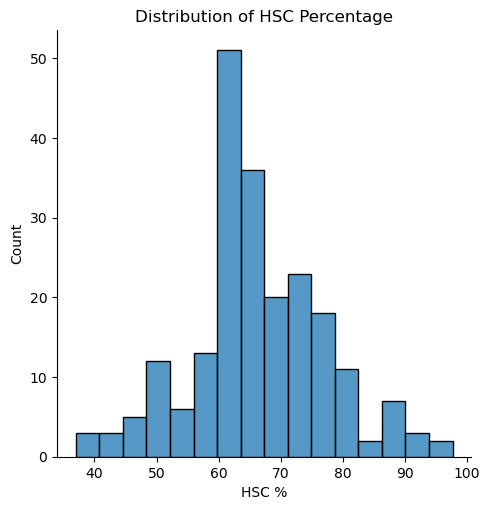

In [ ]:
sns.displot(data['hsc_p'], kde=False)
plt.title('Distribution of HSC Percentage')
plt.xlabel('HSC %')
plt.show()

Text(30.71936728395061, 0.5, 'HSC %')

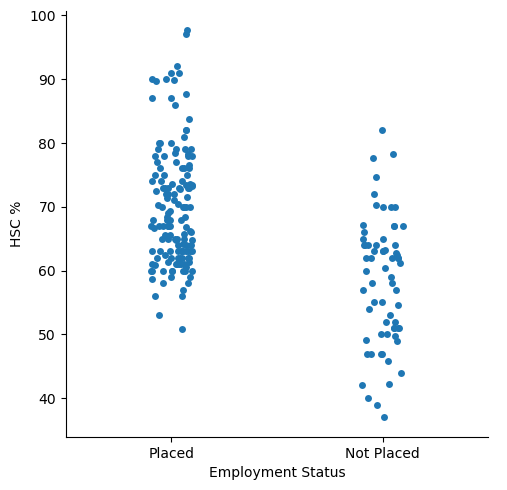

In [ ]:
sns.catplot(y='hsc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

In [ ]:
#Conclusion: HSC percentage are important features. As all placed students have higher percentages.

In [ ]:
#EDA for HSC Board

In [ ]:
data['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data.groupby(['hsc_b','status'])['status'].count())
df

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

<Axes: xlabel='hsc_b', ylabel='count'>

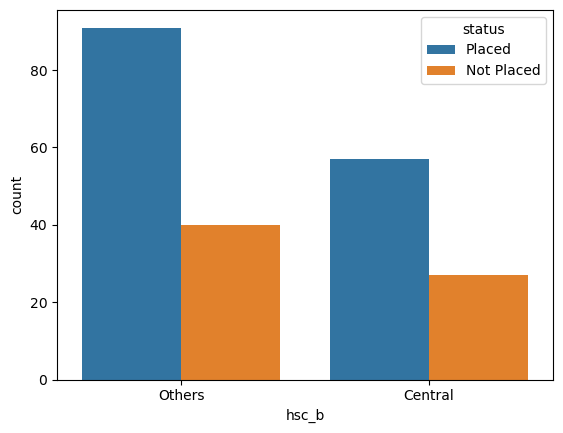

In [ ]:
sns.countplot(x='hsc_b', hue='status', data=data)

In [ ]:
#Conclusion: From the above analysis I can say that, hSC board is not important to recruiters when it come to hiring candidates. So I am not going to use this feature while training model.

In [ ]:
#EDA for HSC Specialisation

In [ ]:
data['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data.groupby(['hsc_s','status'])['status'].count())
df

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

<Axes: xlabel='hsc_s', ylabel='count'>

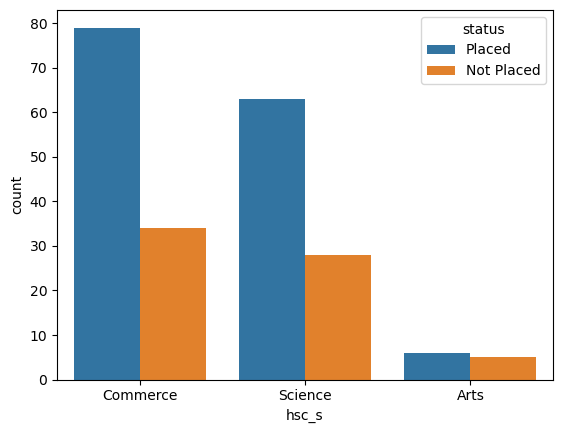

In [ ]:
sns.countplot(x='hsc_s', hue='status', data=data)

In [ ]:
#Degree Percentage

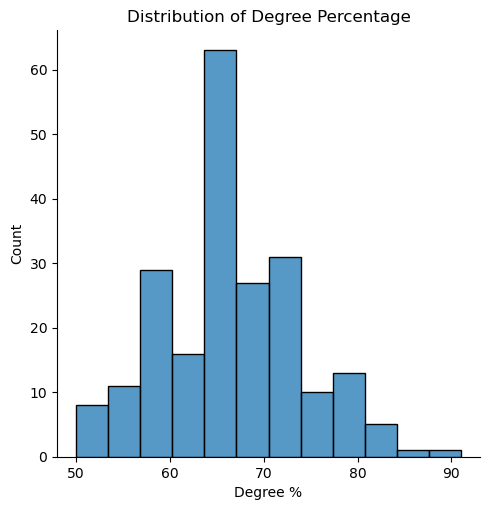

In [ ]:
sns.displot(data['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')
plt.show()

Text(30.522145061728395, 0.5, 'Degree %')

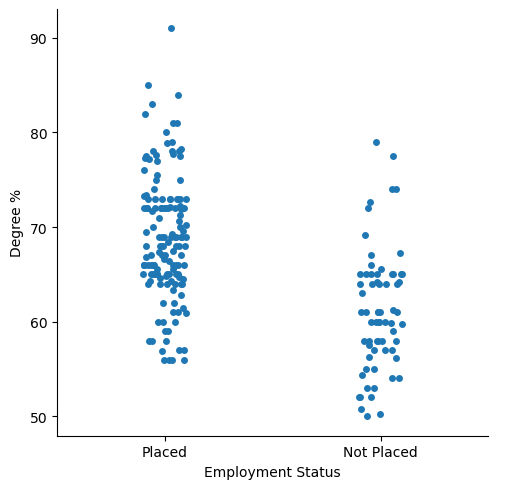

In [ ]:
sns.catplot(y='degree_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

In [ ]:
#conclusion: Like SSC and HSC percentages, Degree Percentages are also impotant factor to get placed.

In [ ]:
#Work Experience

In [ ]:
data['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data.groupby(['workex','status'])['status'].count())
df

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

<Axes: xlabel='workex', ylabel='count'>

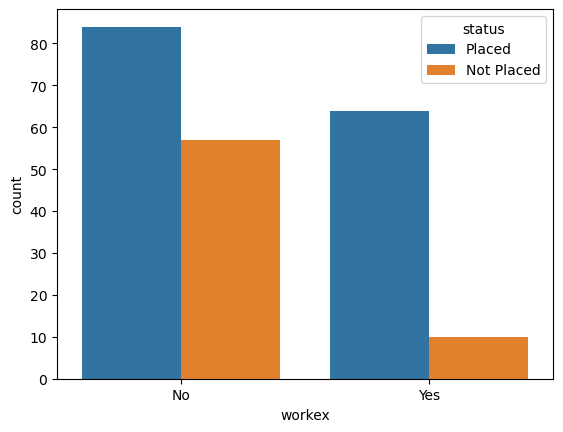

In [ ]:
sns.countplot(x='workex', hue='status', data=data)

In [ ]:
##Conclusion: It is clear that candidate with work experience have higher chance of getting placed.

In [ ]:
## . Employment Test Percentage"

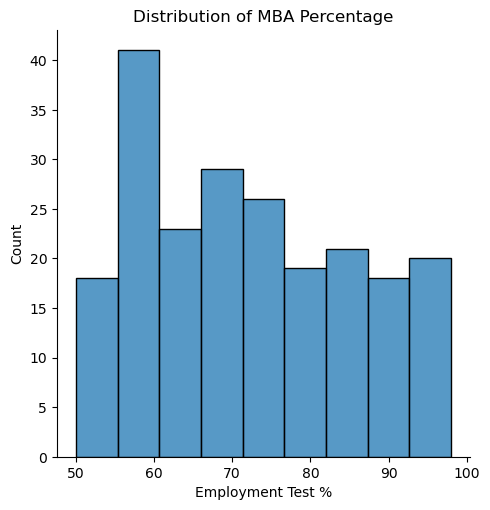

In [ ]:
sns.displot(data['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')
plt.show()

Text(30.575617283950628, 0.5, 'Employment Test %')

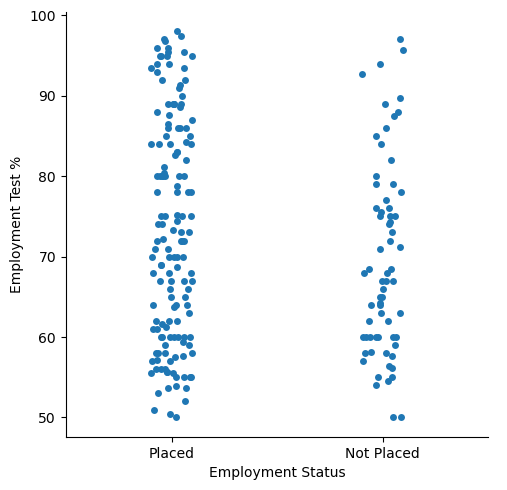

In [ ]:
sns.catplot(y='etest_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

In [ ]:
## Corelation between Features

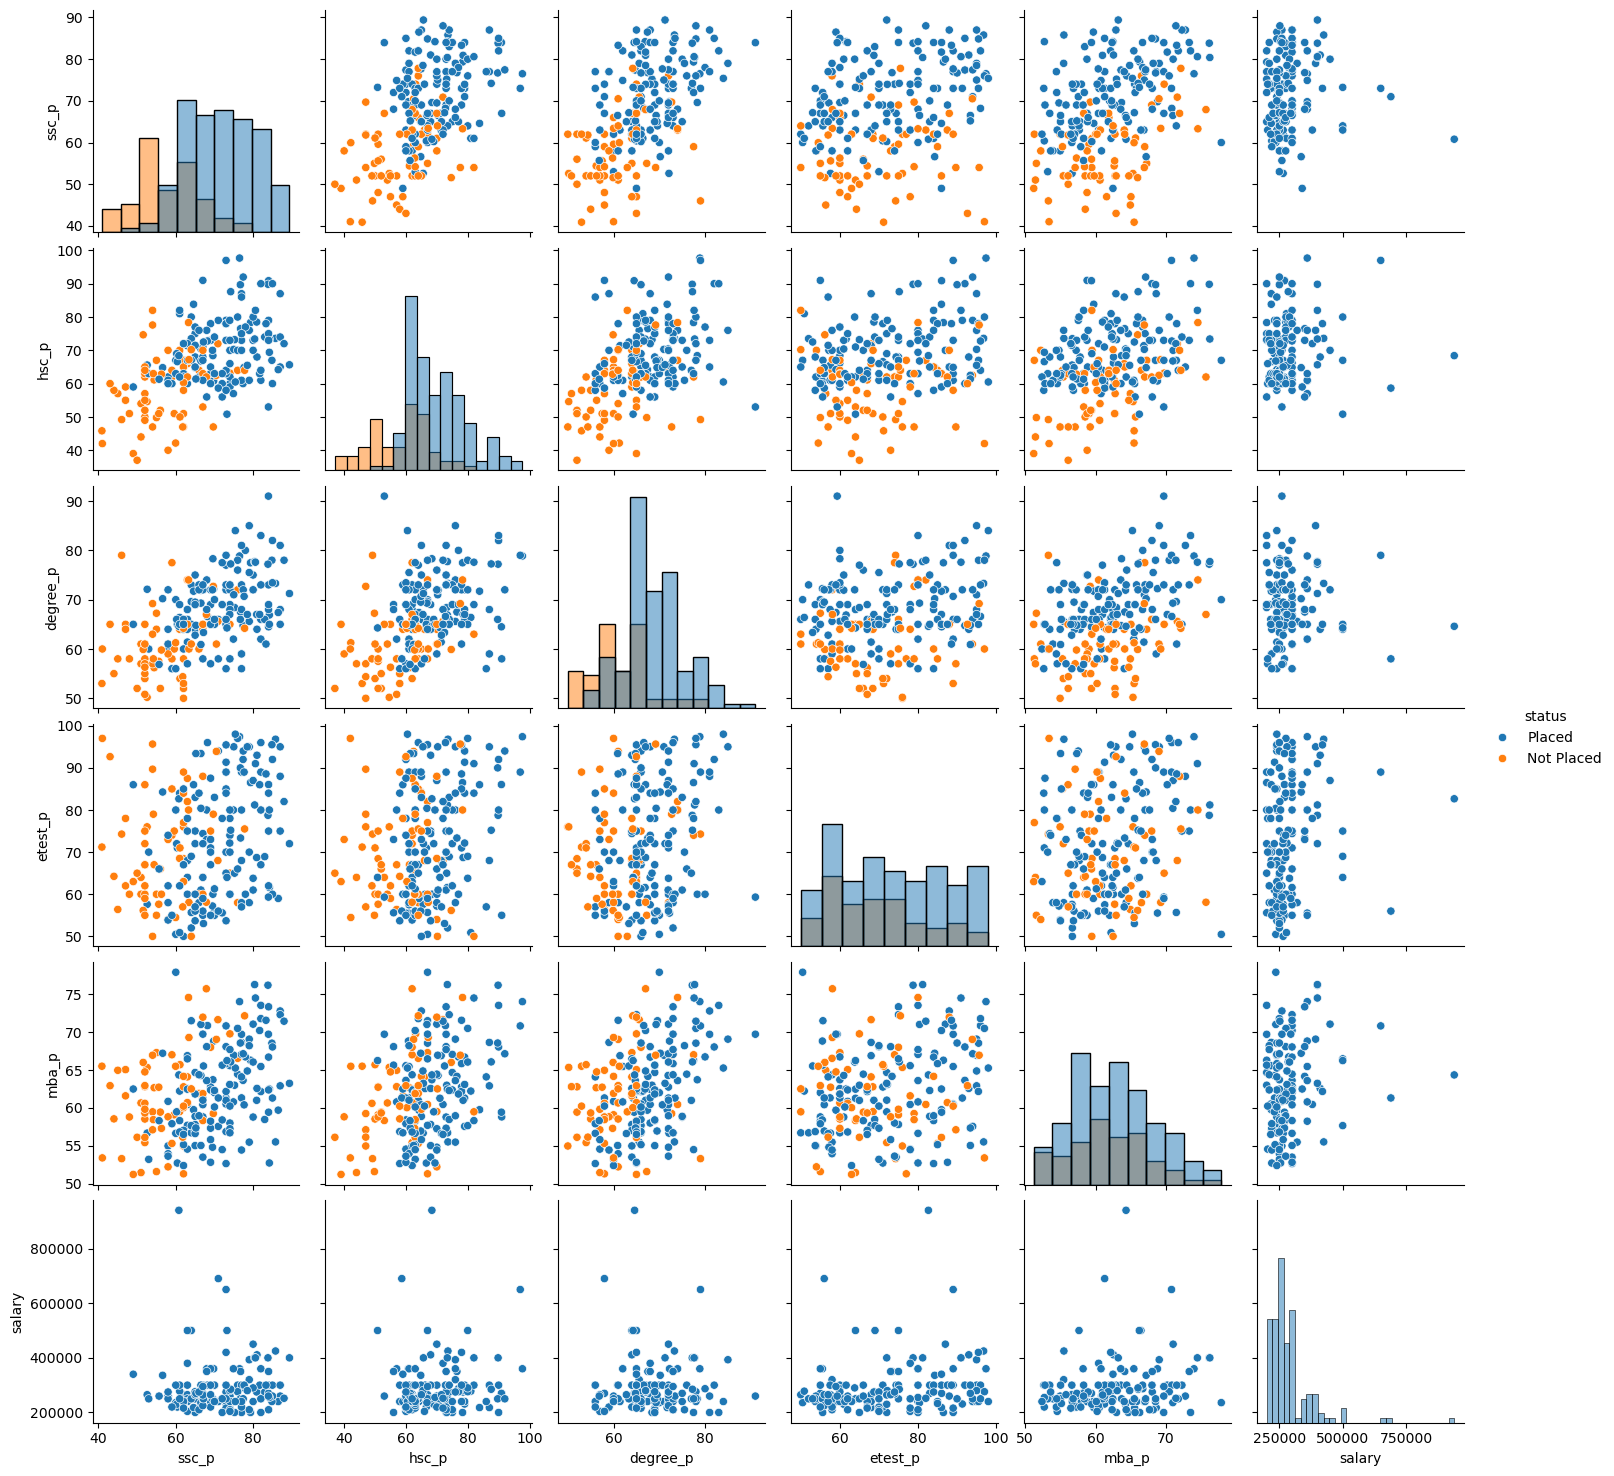

In [ ]:
sns.pairplot(data=data[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

In [ ]:
#Feature mapping

In [ ]:
#Let's drop all unwanted columns as menstioned in above section.

SSC Board
HSC Board
HSC Specialisation
Degree Type
Salary

In [ ]:
data.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [ ]:
#Let's map categorical feature to numeric one. Categorical features:

Gender : Gender feature have male and female values. I am going to map 0 for male and 1 for female.
Work Experience : Work Experience feature have Yes and No values. I am going to map 0 for No and 1 for Yes.
Status : Status feature have Not Placed and Placed values. Again for this features I am mapping 0 for not placed and 1 for placed values.
Specialisation : Specialisation feature have two values Mkt&HR and Mkt&Fin. I am going to map 0 to Mkt&HR and 1 to Mkt&Fin.

In [ ]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
data.columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status'],
      dtype='object')

In [ ]:
data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1
